In [5]:
import pandas as pd

In [6]:
data = pd.read_csv('/content/deliverytime.csv')
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [7]:
data['Delivery_distance'] = (((data['Delivery_location_latitude']-data['Restaurant_latitude'])**2 + (data['Delivery_location_longitude'] - data['Restaurant_longitude'])**2)**(1/2))*10000
data = data.drop(data.columns[4:8], axis = 1)
data = data.drop(data.columns[0:2], axis =1)
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,Time_taken(min),Delivery_distance
0,37,4.9,Snack,motorcycle,24,282.842712
1,34,4.5,Snack,scooter,33,1838.477631
2,23,4.4,Drinks,motorcycle,26,141.421356
3,38,4.7,Buffet,motorcycle,21,707.106781
4,32,4.6,Snack,scooter,30,565.685425


(array([4.5162e+04, 7.0000e+01, 1.7500e+02, 2.4000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2900e+02, 3.3000e+01]),
 array([1.41414285e+02, 1.82673483e+05, 3.65205551e+05, 5.47737619e+05,
        7.30269687e+05, 9.12801755e+05, 1.09533382e+06, 1.27786589e+06,
        1.46039796e+06, 1.64293003e+06, 1.82546210e+06]),
 <BarContainer object of 10 artists>)

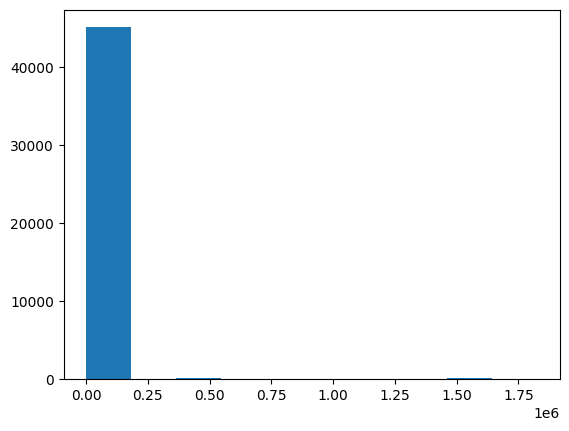

In [9]:
import matplotlib.pyplot as plt
plt.hist(data['Delivery_distance'])

(array([4.5162e+04, 7.0000e+01, 1.7500e+02, 2.4000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2900e+02, 3.3000e+01]),
 array([1.41414285e+02, 1.82673483e+05, 3.65205551e+05, 5.47737619e+05,
        7.30269687e+05, 9.12801755e+05, 1.09533382e+06, 1.27786589e+06,
        1.46039796e+06, 1.64293003e+06, 1.82546210e+06]),
 <BarContainer object of 10 artists>)

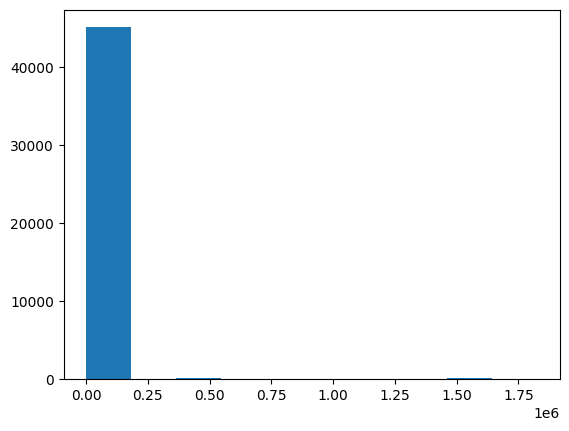

In [10]:

plt.hist(data['Delivery_distance'])

(array([8144., 4020., 4058., 8128., 4068., 4060., 4050., 4050.,    0.,
        4584.]),
 array([ 141.41428535,  325.26275554,  509.11122574,  692.95969594,
         876.80816614, 1060.65663633, 1244.50510653, 1428.35357673,
        1612.20204693, 1796.05051712, 1979.89898732]),
 <BarContainer object of 10 artists>)

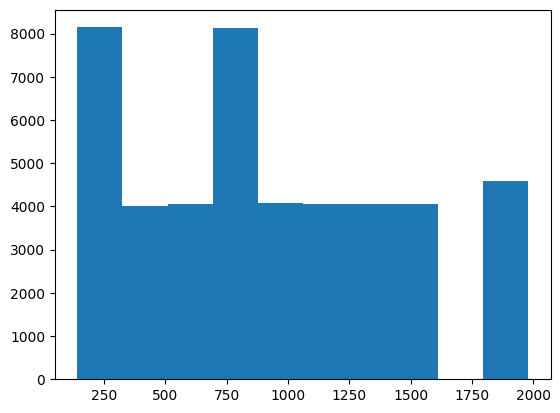

In [11]:
data_cut = data[data['Delivery_distance'] < 1e5]
plt.hist(data_cut['Delivery_distance'])

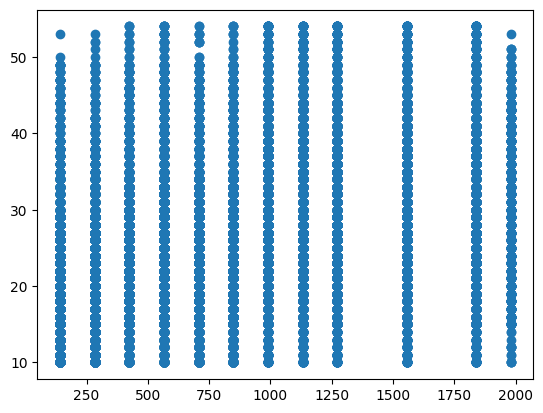

In [12]:
plt.scatter(data_cut['Delivery_distance'],data_cut['Time_taken(min)'])

In [13]:
groupedByVehicle = data_cut.groupby('Type_of_vehicle')
print(groupedByVehicle.mean())

                   Delivery_person_Age  Delivery_person_Ratings  \
Type_of_vehicle                                                   
bicycle                      28.725490                 4.215686   
electric_scooter             29.650933                 4.642347   
motorcycle                   29.544100                 4.626429   
scooter                      29.508165                 4.642565   

                   Time_taken(min)  Delivery_distance  
Type_of_vehicle                                        
bicycle                  26.039216         790.295953  
electric_scooter         24.478400         900.948352  
motorcycle               27.607372         897.575003  
scooter                  24.478876         903.123826  


<ipython-input-13-9a235cf9aaf5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(groupedByVehicle.mean())


In [14]:
groupedByOrder = data_cut.groupby('Type_of_order')
print(groupedByOrder.mean())

               Delivery_person_Age  Delivery_person_Ratings  Time_taken(min)  \
Type_of_order                                                                  
Buffet                   29.580388                 4.634562        26.292297   
Drinks                   29.518307                 4.630762        26.193408   
Meal                     29.589305                 4.630392        26.429492   
Snack                    29.472961                 4.635037        26.276076   

               Delivery_distance  
Type_of_order                     
Buffet                896.685067  
Drinks                898.646133  
Meal                  896.875008  
Snack                 906.059471  


<ipython-input-14-ec3563413feb>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(groupedByOrder.mean())


In [15]:

data_cut['Delivery_person_Age'].max()

50

In [16]:
data_cut['Age'] = (data_cut['Delivery_person_Age']//10) * 10
groupedByAge = data_cut.groupby('Age')
print(groupedByAge.describe())

    Delivery_person_Age                                                     \
                  count       mean       std   min   25%   50%   75%   max   
Age                                                                          
10                 28.0  15.000000  0.000000  15.0  15.0  15.0  15.0  15.0   
20              23171.0  24.825256  2.995922  20.0  22.0  25.0  28.0  29.0   
30              21932.0  34.510761  2.862483  30.0  32.0  35.0  37.0  39.0   
50                 31.0  50.000000  0.000000  50.0  50.0  50.0  50.0  50.0   

    Delivery_person_Ratings            ... Time_taken(min)        \
                      count      mean  ...             75%   max   
Age                                    ...                         
10                     28.0  1.000000  ...           28.25  39.0   
20                  23171.0  4.672479  ...           28.00  54.0   
30                  21932.0  4.593361  ...           35.00  54.0   
50                     31.0  6.000000  ...   

<ipython-input-16-da0069baa01c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cut['Age'] = (data_cut['Delivery_person_Age']//10) * 10


In [17]:
print(groupedByAge[['Time_taken(min)', 'Delivery_distance']].describe())

    Time_taken(min)                                                      \
              count       mean       std   min   25%   50%    75%   max   
Age                                                                       
10             28.0  25.785714  6.166559  13.0  21.0  26.5  28.25  39.0   
20          23171.0  23.228216  8.729739  10.0  17.0  22.0  28.00  54.0   
30          21932.0  29.544228  8.952033  10.0  23.0  29.0  35.00  54.0   
50             31.0  24.677419  9.599955  11.0  17.5  22.0  31.00  48.0   

    Delivery_distance                                                  \
                count        mean         std         min         25%   
Age                                                                     
10               28.0  964.695933  465.162465  141.421356  707.106781   
20            23171.0  898.832203  519.302251  141.414285  424.264069   
30            21932.0  900.313451  518.836936  141.414285  424.264069   
50               31.0  898.709909  5

In [18]:
groupedMulti = data_cut.groupby(['Age','Type_of_vehicle'])
print(groupedMulti.mean())

                       Delivery_person_Age  Delivery_person_Ratings  \
Age Type_of_vehicle                                                   
10  bicycle                      15.000000                 1.000000   
    electric_scooter             15.000000                 1.000000   
    motorcycle                   15.000000                 1.000000   
    scooter                      15.000000                 1.000000   
20  bicycle                      29.000000                 4.600000   
    electric_scooter             24.991654                 4.677517   
    motorcycle                   24.795924                 4.663350   
    scooter                      24.813356                 4.687259   
30  electric_scooter             34.509663                 4.613473   
    motorcycle                   34.500779                 4.588523   
    scooter                      34.528613                 4.596885   
50  bicycle                      50.000000                 6.000000   
    el

<ipython-input-18-d600ba7a2333>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(groupedMulti.mean())


In [19]:
groupedTmp= groupedByAge.get_group(30)
print(groupedTmp.describe())

       Delivery_person_Age  Delivery_person_Ratings  Time_taken(min)  \
count         21932.000000             21932.000000     21932.000000   
mean             34.510761                 4.593361        29.544228   
std               2.862483                 0.334120         8.952033   
min              30.000000                 3.000000        10.000000   
25%              32.000000                 4.400000        23.000000   
50%              35.000000                 4.700000        29.000000   
75%              37.000000                 4.800000        35.000000   
max              39.000000                 5.000000        54.000000   

       Delivery_distance      Age  
count       21932.000000  21932.0  
mean          900.313451     30.0  
std           518.836936      0.0  
min           141.414285     30.0  
25%           424.264069     30.0  
50%           848.528137     30.0  
75%          1272.792206     30.0  
max          1979.898987     30.0  


## 모델 학습


In [31]:
x_data = data_cut.drop(columns='Time_taken(min)',axis=1)
y_data = data_cut['Time_taken(min)']

In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x_data['Type_of_order'] = label_encoder.fit_transform(x_data['Type_of_order'])
x_data['Type_of_vehicle'] = label_encoder.fit_transform(x_data['Type_of_vehicle'])
x_data.head()

,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,Delivery_distance,Age
0,37,4.9,3,2,282.842712,30
1,34,4.5,3,3,1838.477631,30
2,23,4.4,1,2,141.421356,20
3,38,4.7,0,2,707.106781,30
4,32,4.6,3,3,565.685425,30


In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state = 42)

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor()
RandomForestRegressor()
params ={
     'n_estimators':[100],
     'max_depth':[6,8,10,12],
     'min_samples_leaf':[8,12,18],
     'min_samples_split':[8,16,20]
}
grid_cv= GridSearchCV(rfr, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(x_train,y_train)

print("Best Param : ", grid_cv.best_params_)

Best Param :  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 100}


In [39]:
rfr = RandomForestRegressor(n_estimators= 100, max_depth=6, min_samples_leaf=8, min_samples_split=16)
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=8, min_samples_split=16)

In [40]:
pred = rfr.predict(x_test)

In [43]:
import numpy as np
def NMAE(true, pred):
  mae = np.mean(np.abs(true-pred))
  score = mae / np.mean(np.abs(true))
  return score
print(NMAE(y_test, pred))

0.21567462331557957
